In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('Keras version : ', keras.__version__)

Using TensorFlow backend.


Python version :  3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Keras version :  2.2.5


In [0]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) #train set 만들기
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) #test set 만들기

x_train = x_train.astype('float32') / 255. #pixel은 256개로 구성됐으니 256 크기로 구분할 수 있게 변환 - 인풋 포맷팅
x_test = x_test.astype('float32') / 255. 


print('x_train shape:', x_train.shape) #파일개수, x축, y축, layer
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128 #몇개 샘플마다 데이터 갱신할지. 전체 샘플 수 = 6000. 
                  #역전파 (back propagation) 사용, 한 배치 크기돌고 돌이켜봐서 데이터 업데이트 ##몰라도됨
num_classes = 10  
epochs = 12 #갱신을 몇번 할지
            #같은 데이터로 몇번 학습할지 설정

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


![sample output format](https://t1.daumcdn.net/cfile/tistory/99AD6B445AD3868E39)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) #conv, pool 반복

model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) #마지막 단계에서 channel 병합하고 형태 맞추고

model.add(Flatten())

model.add(Dense(1000, activation='relu')) #relu/ softmax 함수로 단순화해서 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary() #결과물 뽑기






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         


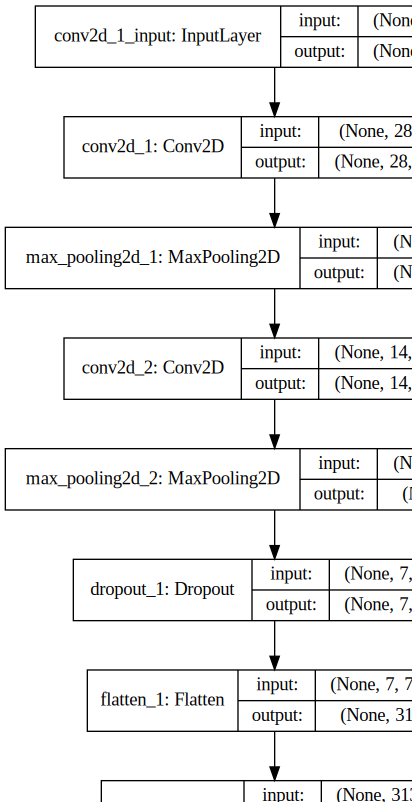

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')) #시각화 툴 - 분석이랑은 상관없음

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #loss function (다음세션), optimizer (adam) 
                                                                                       #loss 는 분석 취지에 맞게, optimizer는 보통 adam으로 공통

hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test)) #조건 다 맞췄으니 딥러닝 돌려봅시다!! 느리면 GPU 사용하기



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.1888 - acc: 0.9407 - val_loss: 0.0529 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0626 - acc: 0.9806 - val_loss: 0.0336 - val_acc: 0.9883
Epoch 3/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0461 - acc: 0.9860 - val_loss: 0.0290 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0372 - acc: 0.9881 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.0225 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0275 - acc: 0.9910 - val_loss: 0.0268 - val_acc: 0.9920
Epoch 7/12
60000/60000 [=

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # accuracy가 매우 높다! 인풋이 정형화되어있어서 가능한 수치

Test loss: 0.019674198364901394
Test accuracy: 0.9942


In [0]:
import matplotlib.pyplot as plt

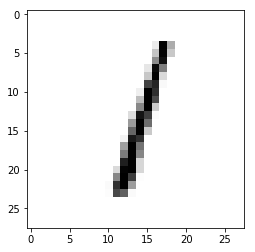

The Answer is  [1]


In [0]:
n = 2
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest') 
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1)))) #이미지와 결과값 비교하기

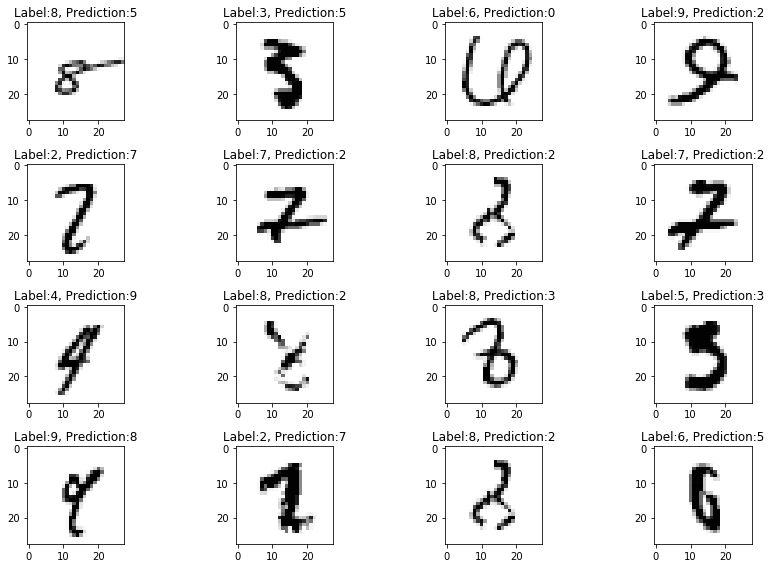

In [0]:
import random

#틀린 결과값을 찾아보기

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()